In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.float_format" , lambda x : "%.4f" %x)
pd.set_option("display.width", 200)

In [3]:
################################################ #
# Rating Products
################################################ #

##########################################
# Application: User and Time Weighted Course Score Calculation
##########################################

In [4]:
path = "/Users/gokhanersoz/Desktop/VBO_Dataset/course_reviews.csv"
course_reviews = pd.read_csv(path)

In [5]:
df = course_reviews.copy()
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0000,0.0000,0.0000
1,5.0000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0000,0.0000,0.0000
2,4.5000,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0000,0.0000,0.0000
3,5.0000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0000,0.0000,0.0000
4,4.0000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0000,0.0000,0.0000


In [8]:
# What stands out here is that timestamp is classified as object...

df.dtypes

Rating                float64
Timestamp              object
Enrolled               object
Progress              float64
Questions Asked       float64
Questions Answered    float64
dtype: object

In [9]:
df.describe([.01, .99]).T

,count,mean,std,min,1%,50%,99%,max
Rating,4323.0000,4.7643,0.5196,1.0000,3.0000,5.0000,5.0000,5.0000
Progress,4323.0000,27.1975,29.1421,0.0000,0.0000,15.0000,100.0000,100.0000
Questions Asked,4323.0000,0.2218,0.9896,0.0000,0.0000,0.0000,4.0000,22.0000
Questions Answered,4323.0000,0.3310,6.2105,0.0000,0.0000,0.0000,5.0000,356.0000


In [157]:
def boxplot(dataframe,num_cols):
    
    i=1
    size = 15
    num = len(num_cols)
    plt.figure(figsize = (15,7))
    
    for col in num_cols:
        plt.subplot(1,num,i)
        
        sns.boxplot(dataframe[col])
        plt.title(f"{col.upper()} Outliers", fontsize = size)
        plt.xlabel(f"{col}",fontsize = size)
        plt.ylabel("Values" ,fontsize = size)
        plt.tight_layout(pad = 4)
        i+=1
        
    plt.show()

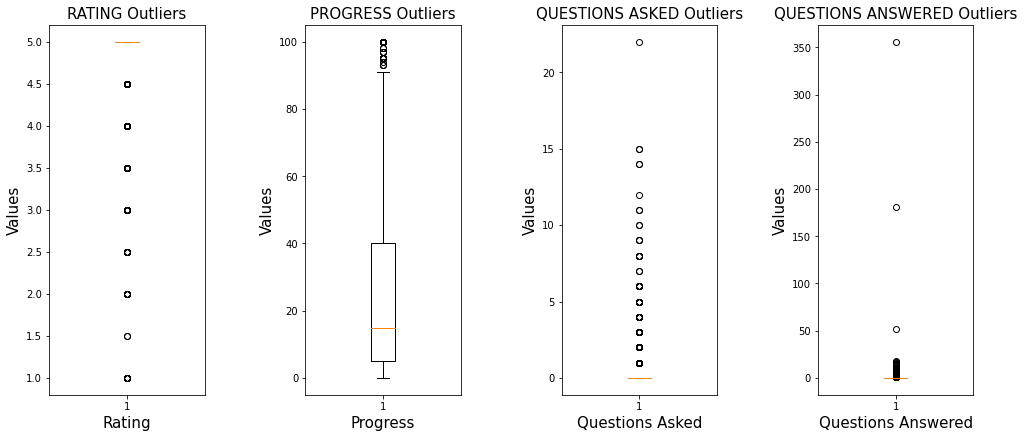

In [24]:
num_cols = [col for col in df.columns if df[col].dtype != "object"]
boxplot(df,num_cols)

In [28]:
# Rating Distribution
rating = pd.DataFrame(df["Rating"].value_counts()).reset_index()
rating.columns = ["Rating","Values"]
rating

,Rating,Values
0,5.0000,3267
1,4.5000,475
2,4.0000,383
3,3.5000,96
4,3.0000,62
5,1.0000,15
6,2.0000,12
7,2.5000,11
8,1.5000,2


In [30]:
# Questions Asked Distribution

answered = pd.DataFrame(df["Questions Answered"].value_counts()).reset_index()
answered.columns = ["Questions Answered Values", "Values Counts"]
answered

,Questions Answered Values,Values Counts
0,0.0000,3977
1,1.0000,202
2,2.0000,50
3,3.0000,30
4,4.0000,19
5,7.0000,12
6,5.0000,9
7,8.0000,4
8,14.0000,4
9,6.0000,3


In [33]:
# The score given in the breakdown of the question asked

df.groupby("Questions Answered").agg({"Questions Asked" : "count" , "Rating" : "mean"})

,Questions Asked,Rating
Questions Answered,,
0.0000,3977,4.7606
1.0000,202,4.8465
2.0000,50,4.7300
3.0000,30,4.7500
4.0000,19,4.7368
5.0000,9,4.9444
6.0000,3,5.0000
7.0000,12,4.7500
8.0000,4,5.0000


In [34]:
####################
# average
####################

# Average Score

# Is it the real average?

mean = df.Rating.mean()

# It may have lost the trend !!! Time can have an effect!!!!
# I want to catch the current trend ...

print("Rating Mean : {}".format(mean))

Rating Mean : 4.764284061993986


In [35]:
####################
# Time-Based Weighted Average
####################

# Weighted Average by Point Times !!!!!
# Get weights based on time intervals

In [36]:
# Now it was an object when we examined it above, now we will convert it to a time variable
# TimeStamp last logged in

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["Timestamp"].dtype

dtype('<M8[ns]')

In [37]:
print("Max Time : {}".format(df["Timestamp"].max()))
print("Min Time : {}".format(df["Timestamp"].min()))

Max Time : 2021-02-05 07:45:55
Min Time : 2019-05-16 13:40:35


In [38]:
current_date = pd.to_datetime("2021-02-10")
current_date

Timestamp('2021-02-10 00:00:00')

In [39]:
df.head()

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered
0,5.0000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0000,0.0000,0.0000
1,5.0000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0000,0.0000,0.0000
2,4.5000,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0000,0.0000,0.0000
3,5.0000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0000,0.0000,0.0000
4,4.0000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0000,0.0000,0.0000


In [40]:
import datetime as dt
df["days"] = (current_date - df["Timestamp"]).dt.days
df.sort_values(by = "days")

,Rating,Timestamp,Enrolled,Progress,Questions Asked,Questions Answered,days
0,5.0000,2021-02-05 07:45:55,2021-01-25 15:12:08,5.0000,0.0000,0.0000,4
1,5.0000,2021-02-04 21:05:32,2021-02-04 20:43:40,1.0000,0.0000,0.0000,5
2,4.5000,2021-02-04 20:34:03,2019-07-04 23:23:27,1.0000,0.0000,0.0000,5
3,5.0000,2021-02-04 16:56:28,2021-02-04 14:41:29,10.0000,0.0000,0.0000,5
4,4.0000,2021-02-04 15:00:24,2020-10-13 03:10:07,10.0000,0.0000,0.0000,5
...,...,...,...,...,...,...,...
4316,5.0000,2019-05-17 17:46:04,2019-05-16 20:25:44,3.0000,0.0000,0.0000,634
4320,5.0000,2019-05-16 20:22:26,2019-05-16 20:21:19,1.0000,0.0000,0.0000,635
4321,5.0000,2019-05-16 19:49:07,2019-05-16 19:47:29,1.0000,0.0000,0.0000,635
4319,5.0000,2019-05-16 21:27:05,2019-05-16 20:32:15,5.0000,0.0000,0.0000,635


In [82]:
def time_based_weighted_average(data , w1 = 28 , w2 = 26 , w3 = 24 , w4 = 22):
    
    results = \
    data.loc[ data["days"] <= 30 , "Rating"].mean() * w1 / 100 + \
    data.loc[ (data["days"] > 30) & (data["days"] <= 90) , "Rating"].mean() * w2/ 100 + \
    data.loc[ (data["days"] >90) & (data["days"] <=180) , "Rating"].mean() * w3 / 100 + \
    data.loc[ (data["days"] > 180) , "Rating"].mean() * w4 / 100
    
    return results

In [75]:
print("By Time Average : {}".format(time_based_weigted_average(df)))

By Time Average : 4.765025682267194


In [51]:
print("Progress Max : {}".format(df.Progress.max()))
print("Progress Min : {}".format(df.Progress.min()))

Progress Max : 100.0
Progress Min : 0.0


In [66]:
# Can the average of those who make 0 progress be equal to the average of those who make 100 progress?

df.groupby("Progress").agg({"Progress" : "count" , "Rating" : "mean"})

,Progress,Rating
Progress,,
0.0000,69,4.6739
1.0000,431,4.6427
2.0000,84,4.6548
3.0000,107,4.6636
4.0000,247,4.7773
...,...,...
94.0000,1,5.0000
95.0000,17,4.7941
97.0000,4,5.0000


In [67]:
####################
# User-Based Weighted Average
####################

# Weighted Average by User Quality

In [70]:
def user_based_weighted_average(data , w1 = 22 , w2 = 24, w3 = 26, w4 = 28):
    
    results = \
        data.loc[ data["Progress"] <= 10 ,"Rating"].mean() * w1 / 100 + \
        data.loc[ (data["Progress"] > 10) & (data["Progress"] <= 45), "Rating"].mean() * w2/100 + \
        data.loc[ (data["Progress"] > 45) & (data["Progress"] <=75), "Rating"].mean() * w3/100 + \
        data.loc[ data["Progress"] > 75, "Rating"].mean() * w4 / 100
    
    return results

In [71]:
# Do you think this is average?
df.loc[df["Progress"] <= 10, "Rating"].mean(),df.loc[df["Progress"] > 75 , "Rating"].mean()

(4.709052851909995, 4.860491071428571)

In [72]:
print("User Based Weighted Average : {}".format(user_based_weighted_average(df)))

User Based Weighted Average : 4.800257704672543


In [73]:
####################
# Weighted Rating
####################

In [83]:
def course_weighted_rating(data, time_w = 50, user_w = 50):
    
    results = user_based_weighted_average(data) * user_w / 100 + \
              time_based_weighted_average(data) * time_w / 100
    
    return results

In [85]:
print("Before Weighted Rating : {}".format(df.Rating.mean()))
print("After Weighted Rating : {}".format(course_weighted_rating(df)))

Before Weighted Rating : 4.764284061993986
After Weighted Rating : 4.782641693469868


In [86]:
################################################ #
# Sorting Products
################################################ #

################################################ #
# Application: Course Sorting
################################################ #

In [87]:
path = "/Users/gokhanersoz/Desktop/VBO_Dataset/product_sorting.csv"
product_sorting = pd.read_csv(path)

In [89]:
df = product_sorting.copy()
print("DataFrame Shape : {}".format(df.shape))

DataFrame Shape : (32, 10)


In [90]:
df.head()

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10


In [91]:
df.describe([.01, .99]).T

,count,mean,std,min,1%,50%,99%,max
purchase_count,32.0000,7110.7188,9760.8934,30.0000,51.0800,3687.5000,41011.5800,48291.0000
rating,32.0000,4.3562,0.4479,3.1000,3.1310,4.5000,4.8000,4.8000
commment_count,32.0000,882.0625,1321.4989,7.0000,8.8600,194.5000,4579.7700,4621.0000
5_point,32.0000,598.0938,920.1401,1.0000,2.8600,112.5000,3309.7600,3466.0000
4_point,32.0000,211.5312,312.2629,2.0000,2.3100,45.5000,1060.6200,1122.0000
3_point,32.0000,54.1250,76.5762,0.0000,0.6200,14.5000,279.5900,314.0000
2_point,32.0000,9.5312,12.9913,0.0000,0.0000,3.0000,45.6900,46.0000
1_point,32.0000,8.9688,14.5702,0.0000,0.0000,3.0000,60.1800,67.0000


In [92]:
####################
# Sorting by Rating
####################

In [93]:
# Did he buy the courses? Or did he give out coupons?
df.sort_values(by = "rating" , ascending = False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0
19,Alıştırmalarla SQL Öğreniyorum,Veri Bilimi Okulu,3155,4.8000,235,200,31,4,0,0
5,Course_1,Instructor_2,4601,4.8000,213,164,45,4,0,0
6,Course_2,Instructor_3,3171,4.7000,856,582,205,51,9,9
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24
8,A'dan Z'ye Apache Spark (Scala & Python),Veri Bilimi Okulu,6920,4.7000,214,154,41,13,2,4
13,Course_5,Instructor_6,6056,4.7000,144,82,46,12,1,3
27,Course_15,Instructor_1,1164,4.6000,98,65,24,6,0,3
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45


In [94]:
####################
# Sorting by Comment Count or Purchase Count
####################

In [95]:
df.sort_values(by = "commment_count" , ascending = False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45
20,Course_9,Instructor_3,12946,4.5000,3371,2191,877,203,33,67
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,11397,4.5000,2353,1435,705,165,24,24
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10
9,Modern R Programlama Eğitimi,Veri Bilimi Okulu,6537,4.4000,901,559,252,72,9,9


In [96]:
df.sort_values(by = "purchase_count" , ascending = False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45
11,Course_3,Instructor_4,24809,4.3000,250,95,87,51,12,5
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6
20,Course_9,Instructor_3,12946,4.5000,3371,2191,877,203,33,67
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,11397,4.5000,2353,1435,705,165,24,24
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0
8,A'dan Z'ye Apache Spark (Scala & Python),Veri Bilimi Okulu,6920,4.7000,214,154,41,13,2,4


In [97]:
####################
# Sorting by Rating, Comment and Purchase
####################

# We did these things because someone can dominate someone else, we have to prevent them ....

In [98]:
from sklearn.preprocessing import MinMaxScaler

df["purchase_count_scaled"] = MinMaxScaler(feature_range=(1,5)).fit_transform(df[["purchase_count"]])
df["comment_count_scaled"] = MinMaxScaler(feature_range=(1,5)).fit_transform(df[["commment_count"]])

In [99]:
df.head()

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6,2.4380,5.0000
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45,5.0000,4.8847
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24,2.5468,3.0416
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21,1.5467,1.8843
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10,1.9352,1.8340


In [100]:
def weighted_sorting_score(data, w1 = 32 , w2 = 26 , w3 = 42):
    results = data["comment_count_scaled"]*w1 / 100 + \
              data["purchase_count_scaled"]*w2 / 100 + \
              data["rating"]*w3 / 100
    
    return results

In [102]:
df["weighted_sorting_score"] = weighted_sorting_score(df)
df[["rating","weighted_sorting_score"]].head()

,rating,weighted_sorting_score
0,4.8000,4.2499
1,4.6000,4.7951
2,4.4000,3.4835
3,4.6000,2.9371
4,4.6000,3.0220


In [104]:
df.sort_values(by = "weighted_sorting_score", ascending = False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45,5.0000,4.8847,4.7951
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6,2.4380,5.0000,4.2499
20,Course_9,Instructor_3,12946,4.5000,3371,2191,877,203,33,67,2.0705,3.9163,3.6816
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24,2.0661,3.0962,3.5020
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24,2.5468,3.0416,3.4835
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0,1.7894,2.9584,3.4279
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,11397,4.5000,2353,1435,705,165,24,24,1.9421,3.0338,3.3658
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10,1.9352,1.8340,3.0220
11,Course_3,Instructor_4,24809,4.3000,250,95,87,51,12,5,3.0537,1.2107,2.9874
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21,1.5467,1.8843,2.9371


In [123]:
####################
# Bayesian Average Rating Score
####################

# Sorting Products with 5 Star Rated
# Sorting Products According to Distribution of 5 Star Rating

import scipy.stats as st
import math

def bayesian_average_rating(n, confidence=0.95):
    """
    
    Function used to calculate the wilson lower bound score in the N-star rating system.
     parameters
     ----------
     n: list or df
         keeps the frequencies of the scores.
         Example: [2, 40, 56, 12, 90] 2 points of 1, 40 points of 2, ... , 90 of 5 points.
     confidence: float
         confidence interval

    Returns
     -------
     BAR score: float
         BAR or WLB scores

     """

     # return zero if the sum of ratings is zero.
    
    if sum(n) == 0:
        return 0
    
     # unique number of stars. If there is a score from 5 stars, it will be 5.
    
    K = len(n)
    
     # Z-score relative to 0.95.
    
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    
     # total number of ratings.
    
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    
     # Browse star numbers with index information.
     # perform the calculations in the formulation.
    
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    
    return score

In [124]:
new_df = df.loc[:, df.columns.str.contains("point")]
new_df.head()

,5_point,4_point,3_point,2_point,1_point
0,3466,924,185,46,6
1,2962,1122,314,45,45
2,1582,567,165,24,24
3,688,257,51,10,21
4,717,194,38,10,10


In [125]:
bayesian_average_rating([2,3,4,5,6])

2.878600838347241

In [126]:
bayesian_average_rating([6,5,4,3,2])

2.0786008383472416

In [127]:
bayesian_average_rating([6,5,4,6,3])

2.329715395111499

In [128]:
# Did you pay any attention here? The distribution goes from 1 to 5.
# DataFrame may sound different to you, but beware !!!!

df["bar_sorting_score"] = df.apply(lambda x : bayesian_average_rating(x[["1_point",
                                                                         "2_point",
                                                                         "3_point",
                                                                         "4_point",
                                                                         "5_point"]]), axis = 1 )

# Here, for example, we are looking at points 1 and 2 and 0 points, this may be an old one for us because it has no history, it is new
# He did not receive the resistance of his market did not receive every comment and was not evaluated !!!!
# Did he really catch this???


df.sort_values(by = "bar_sorting_score", ascending = False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score,bar_sorting_score
19,Alıştırmalarla SQL Öğreniyorum,Veri Bilimi Okulu,3155,4.8000,235,200,31,4,0,0,1.2590,1.1977,2.7266,4.7291
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6,2.4380,5.0000,4.2499,4.6659
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0,1.7894,2.9584,3.4279,4.6417
5,Course_1,Instructor_2,4601,4.8000,213,164,45,4,0,0,1.3789,1.1786,2.7517,4.6345
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10,1.9352,1.8340,3.0220,4.5957
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24,2.0661,3.0962,3.5020,4.5682
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45,5.0000,4.8847,4.7951,4.5160
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24,2.5468,3.0416,3.4835,4.5152
6,Course_2,Instructor_3,3171,4.7000,856,582,205,51,9,9,1.2603,1.7360,2.8572,4.5080
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21,1.5467,1.8843,2.9371,4.4821


In [129]:
df.sort_values("weighted_sorting_score", ascending=False).head(10)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score,bar_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45,5.0000,4.8847,4.7951,4.5160
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6,2.4380,5.0000,4.2499,4.6659
20,Course_9,Instructor_3,12946,4.5000,3371,2191,877,203,33,67,2.0705,3.9163,3.6816,4.4806
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24,2.0661,3.0962,3.5020,4.5682
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24,2.5468,3.0416,3.4835,4.5152
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0,1.7894,2.9584,3.4279,4.6417
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,11397,4.5000,2353,1435,705,165,24,24,1.9421,3.0338,3.3658,4.4548
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10,1.9352,1.8340,3.0220,4.5957
11,Course_3,Instructor_4,24809,4.3000,250,95,87,51,12,5,3.0537,1.2107,2.9874,3.8777
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21,1.5467,1.8843,2.9371,4.4821


In [130]:
####################
# Hybrid Sorting: BAR Score + Other Factor
####################

In [133]:
def weighted_sorting_score(data , w1 = 31 , w2 = 26 , w3=42):
    
    results = data["comment_count_scaled"] * w1 / 100 + \
              data["purchase_count_scaled"] * w2 / 100 + \
              data["rating"] * w3 / 100
    
    return results


def pointing_sorting_score(data):
    
    results = data.apply(lambda x : bayesian_average_rating(x[["1_point",
                                                               "2_point",
                                                               "3_point",
                                                               "4_point",
                                                               "5_point"]]), axis = 1)
    
    return results

In [136]:
def hybrid_sorting_score(data , bar_w = 60 , wss_w = 40):
    
    results = pointing_sorting_score(data) * bar_w / 100 + \
              weighted_sorting_score(data) * wss_w / 100
    
    return results

In [140]:
df["hybrid_sorting_score"] = hybrid_sorting_score(df)

In [142]:
df.sort_values(by = "hybrid_sorting_score" , ascending= False) 

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score,bar_sorting_score,hybrid_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45,5.0000,4.8847,4.7951,4.5160,4.6081
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6,2.4380,5.0000,4.2499,4.6659,4.4795
20,Course_9,Instructor_3,12946,4.5000,3371,2191,877,203,33,67,2.0705,3.9163,3.6816,4.4806,4.1453
10,İleri Düzey Excel|Dashboard|Excel İp Uçları,Veri Bilimi Okulu,9554,4.8000,2266,1654,499,91,22,0,1.7894,2.9584,3.4279,4.6417,4.1443
14,Uçtan Uca SQL Server Eğitimi,Veri Bilimi Okulu,12893,4.7000,2425,1722,510,145,24,24,2.0661,3.0962,3.5020,4.5682,4.1293
2,5 Saatte Veri Bilimci Olun (Valla Billa),Instructor_1,18693,4.4000,2362,1582,567,165,24,24,2.5468,3.0416,3.4835,4.5152,4.0904
15,Uygulamalarla SQL Öğreniyorum,Veri Bilimi Okulu,11397,4.5000,2353,1435,705,165,24,24,1.9421,3.0338,3.3658,4.4548,4.0071
4,(2020) Python ile Makine Öğrenmesi (Machine Le...,Veri Bilimi Okulu,11314,4.6000,969,717,194,38,10,10,1.9352,1.8340,3.0220,4.5957,3.9589
19,Alıştırmalarla SQL Öğreniyorum,Veri Bilimi Okulu,3155,4.8000,235,200,31,4,0,0,1.2590,1.1977,2.7266,4.7291,3.9233
5,Course_1,Instructor_2,4601,4.8000,213,164,45,4,0,0,1.3789,1.1786,2.7517,4.6345,3.8766


In [143]:
df[df["course_name"].str.contains("Veri Bilimi")].sort_values(by = "hybrid_sorting_score" , ascending = False)

,course_name,instructor_name,purchase_count,rating,commment_count,5_point,4_point,3_point,2_point,1_point,purchase_count_scaled,comment_count_scaled,weighted_sorting_score,bar_sorting_score,hybrid_sorting_score
1,Python: Yapay Zeka ve Veri Bilimi için Python ...,Veri Bilimi Okulu,48291,4.6000,4488,2962,1122,314,45,45,5.0000,4.8847,4.7951,4.5160,4.6081
0,(50+ Saat) Python A-Z™: Veri Bilimi ve Machine...,Veri Bilimi Okulu,17380,4.8000,4621,3466,924,185,46,6,2.4380,5.0000,4.2499,4.6659,4.4795
3,R ile Veri Bilimi ve Machine Learning (35 Saat),Veri Bilimi Okulu,6626,4.6000,1027,688,257,51,10,21,1.5467,1.8843,2.9371,4.4821,3.8566
7,Veri Bilimi için İstatistik: Python ile İstati...,Veri Bilimi Okulu,929,4.5000,126,88,26,9,0,3,1.0745,1.1032,2.5224,4.3422,3.6099


In [144]:
############################################
# SORTING PRODUCTS - CONTINUE
############################################

############################################
# Uygulama: IMDB Movie Scoring & Sorting
############################################

In [146]:
path = "/Users/gokhanersoz/Desktop/VBO_Dataset/movies_metadata.csv"
movies_metadata = pd.read_csv(path, low_memory=False)

In [147]:
df = movies_metadata.copy()
print("DataFrame Shape : {}".format(df.shape))

DataFrame Shape : (45466, 24)


In [148]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0000,81.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7000,5415.0000
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0000,104.0000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9000,2413.0000
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0000,101.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5000,92.0000
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0000,127.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1000,34.0000
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0000,106.0000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7000,173.0000


In [149]:
df = df[["title","vote_average","vote_count"]]
df.head()

,title,vote_average,vote_count
0,Toy Story,7.7000,5415.0000
1,Jumanji,6.9000,2413.0000
2,Grumpier Old Men,6.5000,92.0000
3,Waiting to Exhale,6.1000,34.0000
4,Father of the Bride Part II,5.7000,173.0000


In [151]:
print("DataFrame Shape : {}".format(df.shape))
print("Unique Movie Values : {}".format(df.title.nunique()))

DataFrame Shape : (45466, 3)
Unique Movie Values : 42277


In [152]:
########################
# Sort by Vote Average
########################

In [153]:
df.describe([.01 , .99]).T

,count,mean,std,min,1%,50%,99%,max
vote_average,45460.0000,5.6182,1.9242,0.0000,0.0000,6.0000,8.7000,10.0000
vote_count,45460.0000,109.8973,491.3104,0.0000,0.0000,10.0000,2183.8200,14075.0000


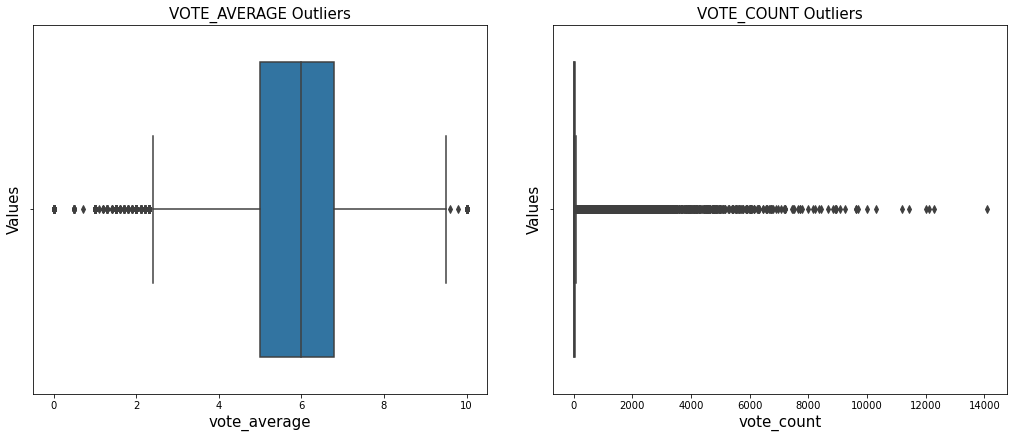

In [159]:
from warnings import filterwarnings
filterwarnings("ignore", category=FutureWarning)

num_cols = [col for col in df.columns if df[col].dtype != "object"]
boxplot(df, num_cols)

In [160]:
df.sort_values(by = "vote_average", ascending = False).head()

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.0000,1.0000
15710,If God Is Willing and da Creek Don't Rise,10.0000,1.0000
22396,Meat the Truth,10.0000,1.0000
22395,Marvin Hamlisch: What He Did For Love,10.0000,1.0000
35343,Elaine Stritch: At Liberty,10.0000,1.0000


In [161]:
df[["vote_count"]].describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,25%,50%,70%,80%,90%,95%,99%,max
vote_count,45460.0000,109.8973,491.3104,0.0000,1.0000,3.0000,10.0000,25.0000,50.0000,160.0000,434.0000,2183.8200,14075.0000


In [162]:
# The distribution of the votes is between 2183.82000 and 14075.00000 there are 35 people !!!! For instance ...
# How many movies are there in December we just looked at it !!!!

pd.DataFrame(pd.cut(df["vote_count"] , [10, 25, 50, 70, 80, 90, 95, 99, 100] ).value_counts()).T

,"(10, 25]","(25, 50]","(50, 70]","(70, 80]","(80, 90]","(90, 95]","(95, 99]","(99, 100]"
vote_count,8262,4450,1591,568,471,217,146,35


In [163]:
df[df["vote_count"] > 400].sort_values(by = "vote_average", ascending = False).head()

,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.1000,661.0000
40251,Your Name.,8.5000,1030.0000
834,The Godfather,8.5000,6024.0000
314,The Shawshank Redemption,8.5000,8358.0000
1152,One Flew Over the Cuckoo's Nest,8.3000,3001.0000


In [164]:
########################
# vote_average * vote_count
########################

df["average_count_score"] = df["vote_average"] * df["vote_count"]
df.sort_values("average_count_score", ascending = False).head()

,title,vote_average,vote_count,average_count_score
15480,Inception,8.1000,14075.0000,114007.5000
12481,The Dark Knight,8.3000,12269.0000,101832.7000
22879,Interstellar,8.1000,11187.0000,90614.7000
17818,The Avengers,7.4000,12000.0000,88800.0000
14551,Avatar,7.2000,12114.0000,87220.8000


In [165]:
df["vote_count_scaled"] = MinMaxScaler(feature_range=(1,10)).fit_transform(df[["vote_count"]])

df["average_count_score_2"] = df["vote_average"] * df["vote_count_scaled"]

df.sort_values("average_count_score_2", ascending = False).head()

,title,vote_average,vote_count,average_count_score,vote_count_scaled,average_count_score_2
15480,Inception,8.1000,14075.0000,114007.5000,10.0000,81.0000
12481,The Dark Knight,8.3000,12269.0000,101832.7000,8.8452,73.4150
22879,Interstellar,8.1000,11187.0000,90614.7000,8.1533,66.0419
17818,The Avengers,7.4000,12000.0000,88800.0000,8.6732,64.1815
14551,Avatar,7.2000,12114.0000,87220.8000,8.7461,62.9717


In [166]:
########################
# weighted_rating
########################

# weighted_rating = (v/(v+M) * r) + (M/(v+M) * C)

# r = vote average
# v = vote count
# M = minimum votes required to be listed in the Top 250
# C = the mean vote across the whole report (currently 7.0)

In [169]:
# Film 1:
r_1 = 8 # vote average
r_2 = 9.5 # vote average
M = 500 # Number of vote min
v = 1000 # Number of votes received
(v / (v + M))* r_1 , (v / (v + M))* r_2

(5.333333333333333, 6.333333333333333)

In [171]:
# Film 2:
# As the number of comments increases, the rating increases....

r = 8
M = 500
v = 3000
v_ = 4000
(v / (v + M))* r , (v_ / (v_ + M))* r

(6.857142857142857, 7.111111111111111)

In [172]:
# Film 1:
# 2. Section :
C = 7
M = 500
v = 1000
(M / (v + M))* C

2.333333333333333

In [179]:
C = 9
M = 500
v = 1000
(M / (v + M))* C

3.0

In [180]:
# Film1 :
5.333333333333333 + 2.333333333333333

7.666666666666666

In [181]:
def weighted_rating(r, v, M, C):
    return (v / (v + M) * r) + (M / (v + M) * C)

In [182]:
df.sort_values("average_count_score" , ascending = False).head(4)

,title,vote_average,vote_count,average_count_score,vote_count_scaled,average_count_score_2
15480,Inception,8.1000,14075.0000,114007.5000,10.0000,81.0000
12481,The Dark Knight,8.3000,12269.0000,101832.7000,8.8452,73.4150
22879,Interstellar,8.1000,11187.0000,90614.7000,8.1533,66.0419
17818,The Avengers,7.4000,12000.0000,88800.0000,8.6732,64.1815


In [183]:
C = df["vote_average"].mean()
M = 2500

weighted_rating(8.10000,14075.00000 , M , C)

7.725672279809078

In [184]:
weighted_rating(7.40000, 11444.00000, M, C)

7.080544896574546

In [185]:
df["weighted_rating"] = weighted_rating(df["vote_average"], df["vote_count"], M, C)

df.sort_values(by = "weighted_rating" , ascending = False).head()

,title,vote_average,vote_count,average_count_score,vote_count_scaled,average_count_score_2,weighted_rating
12481,The Dark Knight,8.3000,12269.0000,101832.7000,8.8452,73.4150,7.8460
314,The Shawshank Redemption,8.5000,8358.0000,71043.0000,6.3444,53.9271,7.8365
2843,Fight Club,8.3000,9678.0000,80327.4000,7.1884,59.6639,7.7495
15480,Inception,8.1000,14075.0000,114007.5000,10.0000,81.0000,7.7257
292,Pulp Fiction,8.3000,8670.0000,71961.0000,6.5439,54.3141,7.6998


In [191]:
# Weighted Average Ratings
# IMDb publishes weighted vote averages rather than raw data averages.
# The simplest way to explain it is that although we accept and consider all votes received by users,
# not all votes have the same impact (or ‘weight’) on the final rating.

# When unusual voting activity is detected,
# an alternate weighting calculation may be applied in order to preserve the reliability of our system.
# To ensure that our rating mechanism remains effective,
# we do not disclose the exact method used to generate the rating.



####################
# Bayesian Average Rating Score
####################

# Sorting Products with 5 Star Rated
# Sorting Products According to Distribution of 5 Star Rating

def bayesian_average_rating(n, confidence=0.95):
    """
    The score system used to calculate the final lower bound score.
    parameters
    ----------
    n: list or df
        keeps the frequencies of the scores.
        Example: [2, 40, 56, 12, 90] 2 points of 1, 40 points of 2, ... , 90 of 5 points.
    trust: floating
        confidence interval

    Returns
    -------
    BAR score: float
        BAR or WLB scores

    """

    #If your ratings are dry, it is zero.
    if sum(n) == 0:
        return 0
    # number of defective stars. If there is a score from 5 stars, it will be 5.
    K = len(n)
    # Z-score relative to 0.95.
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    # total number of ratings.
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    # Browse star numbers with index information.
    # Performs the accounts in #.
    for k, n_k in enumerate(n):
        first_part += (k + 1) * (n[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [193]:
# The Shawshank Redemption (9.2)
bayesian_average_rating([34733, 4355, 4704, 6561, 13515, 26183, 87368, 273082, 600260, 1295351])

9.14538444560111

In [194]:
# The Dark Night (9)
bayesian_average_rating([30345, 7172, 8083, 11429, 23236, 49482, 137745, 354608, 649114, 1034843])

8.895958460049826

In [195]:
rating = pd.read_csv("/Users/gokhanersoz/Desktop/VBO_Dataset/imdb_ratings.csv")
rating = rating.iloc[:,1:] 
rating.head()

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,111161,1. The Shawshank Redemption (1994),9.2000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,68646,2. The Godfather (1972),9.1000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,71562,3. The Godfather: Part II (1974),9.0000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,468569,4. The Dark Knight (2008),9.0000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,50083,5. 12 Angry Men (1957),8.9000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318


In [197]:
# We've seen how close this process comes out...

rating["bar_score"] = rating.apply(lambda x: bayesian_average_rating(x[["one", "two", "three", "four", "five",
                                                                "six", "seven", "eight", "nine", "ten"]]), axis=1)
rating.head(5)

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.2000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.1454
1,68646,2. The Godfather (1972),9.1000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.9400
2,71562,3. The Godfather: Part II (1974),9.0000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.8125
3,468569,4. The Dark Knight (2008),9.0000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.8960
4,50083,5. 12 Angry Men (1957),8.9000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.7679
